In [1]:
import pandas as pd


df = pd.read_csv('dataset/exames.csv')

In [2]:
df.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [3]:
df.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [4]:
df.drop(columns=['exame_33'], inplace=True)

In [54]:
from sklearn.model_selection import train_test_split
from numpy import random
from sklearn.ensemble import RandomForestClassifier


SEED = 13
random.seed(SEED)

df_exams = df.drop(columns=['id', 'diagnostico'])
df_diagnoses = df.diagnostico

train_x, test_x, train_y, test_y = train_test_split(df_exams, df_diagnoses, test_size=.3)


classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(train_x, train_y)
print('Classification accuracy: {:.3f}'.format(classifier.score(test_x, test_y)))

Classification accuracy: 0.953


In [57]:
from sklearn.dummy import DummyClassifier


dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(train_x, train_y)
print('Baseline classification accuracy: {:.2f}'.format(dummy_classifier.score(test_x, test_y)))

Baseline classification accuracy: 0.68


In [8]:
plot_data = pd.concat([df_exams, df_diagnoses], axis=1)
plot_data = pd.melt(plot_data, id_vars="diagnostico")
plot_data.tail()

,diagnostico,variable,value
18203,M,exame_32,0.07115
18204,M,exame_32,0.06637
18205,M,exame_32,0.07820
18206,M,exame_32,0.12400
18207,B,exame_32,0.07039


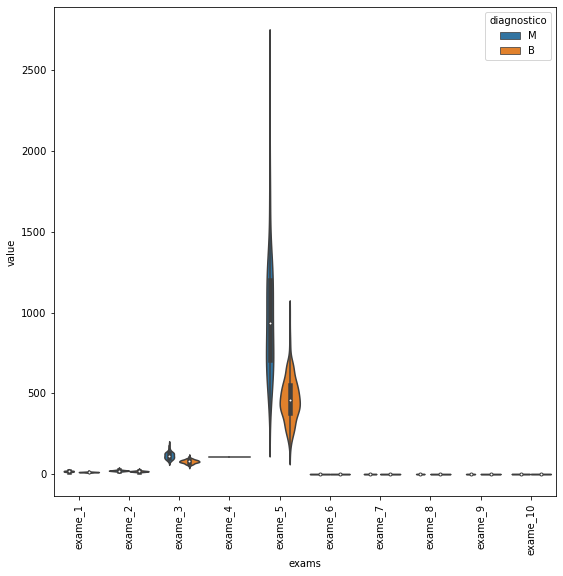

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt



plot_data = pd.concat([df_exams.iloc[:, :10], df_diagnoses], axis=1)
plot_data = pd.melt(plot_data, id_vars="diagnostico")
plot_data.rename(columns={"variable": "exams"}, inplace=True)

plt.figure(figsize=(9,9))
g = sns.violinplot(x="exams", y="value", hue="diagnostico", data=plot_data)
plt.xticks(rotation=90)
plt.show()

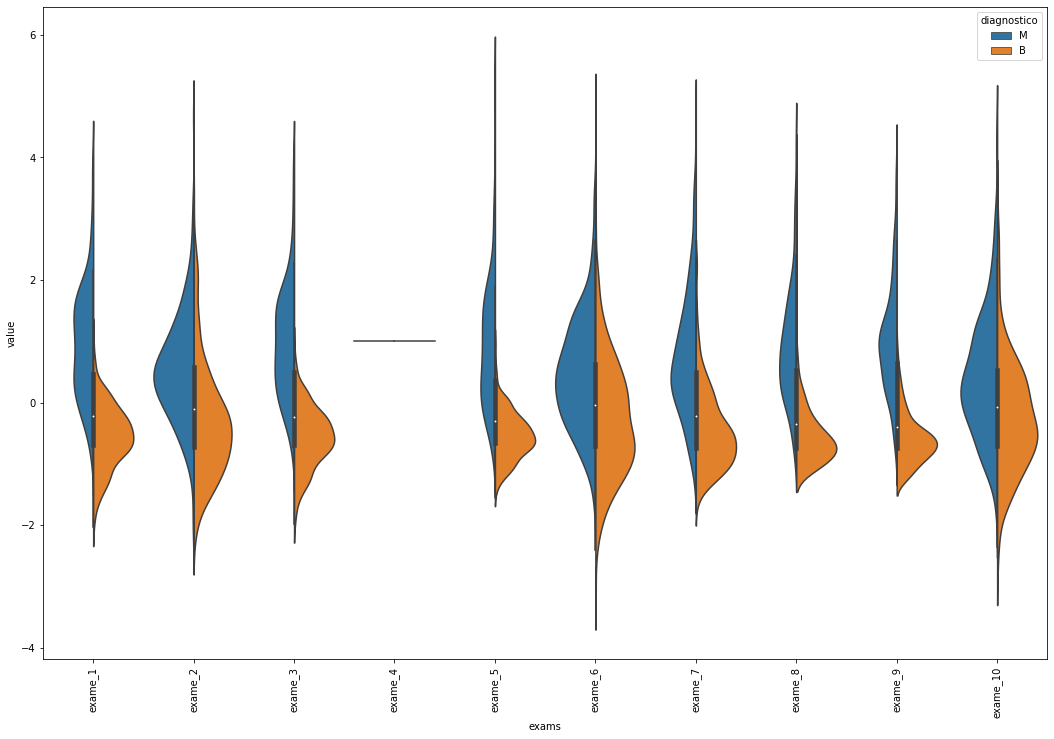

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(df_exams)
df_exams_scaled = scaler.transform(df_exams)
df_exams_scaled = pd.DataFrame(data=df_exams_scaled, columns=df_exams.columns)

plot_data = pd.concat([df_exams_scaled.iloc[:, :10], df_diagnoses], axis=1)
plot_data = pd.melt(plot_data, id_vars="diagnostico")
plot_data.rename(columns={"variable": "exams"}, inplace=True)

plt.figure(figsize=(18,12))
sns.violinplot(x="exams", y="value", hue="diagnostico", data=plot_data, split=True)
plt.xticks(rotation=90)
plt.show()

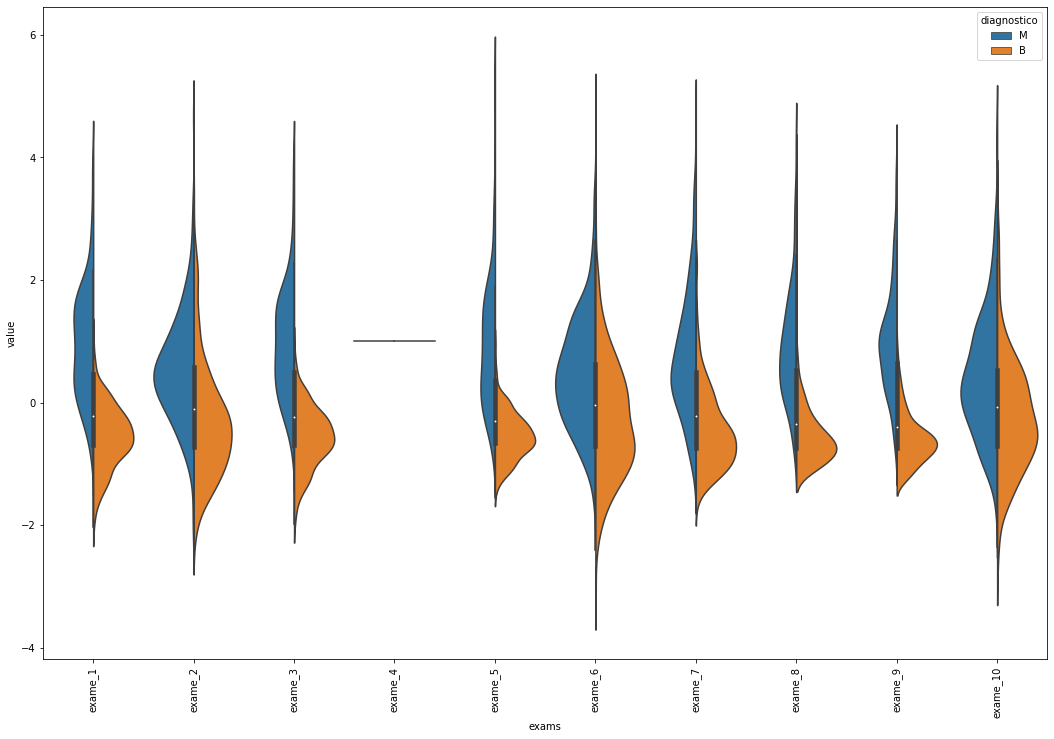

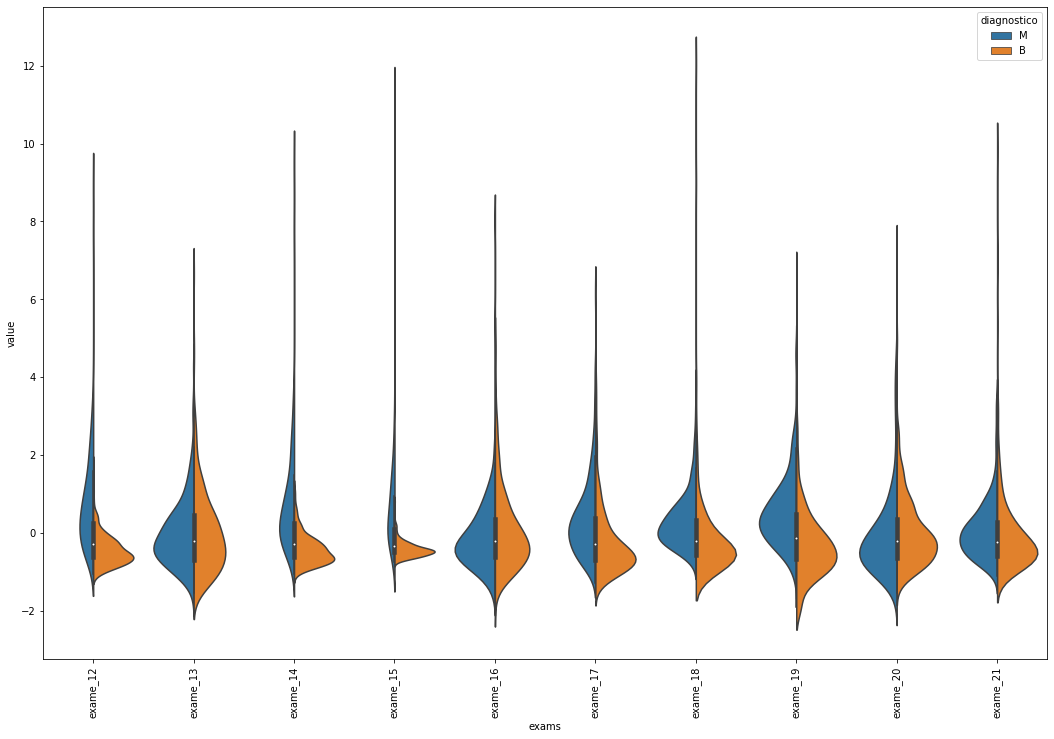

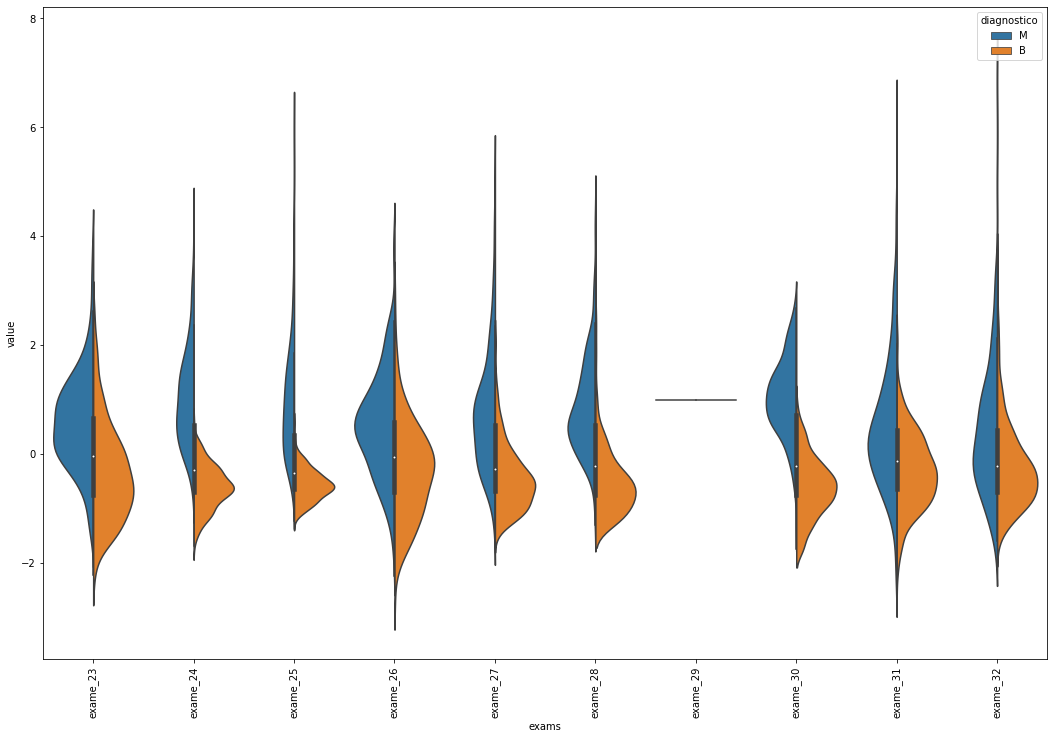

In [11]:
def plot_df_splitted(exams, start, end):
    plot_data = pd.concat([exams.iloc[:, start:end], df_diagnoses], axis=1)
    plot_data = pd.melt(plot_data, id_vars="diagnostico")
    plot_data.rename(columns={"variable": "exams"}, inplace=True)

    plt.figure(figsize=(18,12))
    sns.violinplot(x="exams", y="value", hue="diagnostico", data=plot_data, split=True)
    plt.xticks(rotation=90)
    plt.show()
    
    
plot_df_splitted(df_exams_scaled, 0, 10)
plot_df_splitted(df_exams_scaled, 11, 21)
plot_df_splitted(df_exams_scaled, 22, 32)

In [59]:
df_exams_clean = df_exams_scaled.drop(columns=["exame_4","exame_29"])


def classify_exams(data):
    
    SEED = 13
    random.seed(SEED)

    train_x, test_x, train_y, test_y = train_test_split(data, df_diagnoses, test_size=.3)
    classifier = RandomForestClassifier(n_estimators=100)
    classifier.fit(train_x, train_y)
    print('Classification accuracy: {:.3f}'.format(classifier.score(test_x, test_y)))
    
classify_exams(df_exams_clean)

Classification accuracy: 0.947


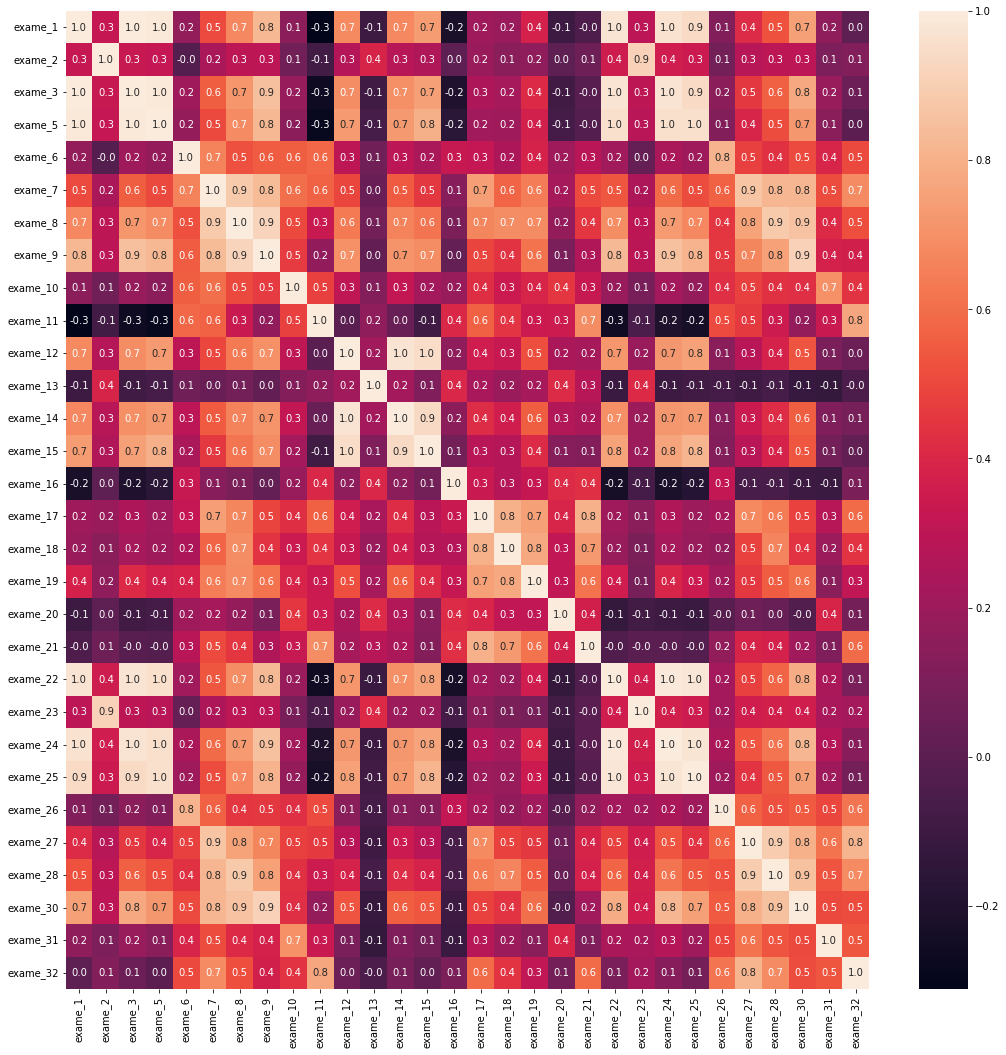

In [30]:
corr_matrix = df_exams_clean.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr_matrix, annot=True, fmt=".1f")
plt.show()

In [31]:
corr_matrix_1 = corr_matrix[corr_matrix>0.99]
corr_variables = corr_matrix_1.sum()
corr_variables

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [32]:
corr_variables = corr_variables[corr_variables>1]
corr_variables

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [33]:
df_exams_clean_2 = df_exams_clean.drop(columns=corr_variables.keys())
df_exams_clean_2

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,...,-1.138416,0.167980,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,...,-0.189161,-0.490556,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,...,-0.891416,0.036727,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,...,0.326634,0.904057,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [61]:
#dropping all 4 correlated vars
classify_exams(df_exams_clean_2)

Classification accuracy: 0.965


In [62]:
#dropping only two correlated vars
df_exams_clean_3 = df_exams_clean.drop(columns=['exame_3', 'exame_22'])
classify_exams(df_exams_clean_3)

Classification accuracy: 0.953


In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


select_k_best = SelectKBest(chi2, k=5)

In [40]:
#error left on purpose
train_x, test_x, train_y, test_y = train_test_split(df_exams_clean_3, df_diagnoses, test_size=.3)

select_k_best.fit(train_x, train_y)

ValueError: Input X must be non-negative.

In [78]:
import numpy as np


df_exams_unscaled = df_exams.drop(columns=['exame_3', 'exame_4', 'exame_22', 'exame_24'])


SEED = 13
np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(df_exams_unscaled, df_diagnoses, test_size=.3)

select_k_best.fit(train_x, train_y)
train_k_best = select_k_best.transform(train_x)
test_k_best = select_k_best.transform(test_x)

In [79]:
print("Checking feature selection. Num_features: {}".format(train_k_best.shape[1]))

Checking feature selection. Num_features: 5


In [81]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(train_k_best, train_y)
print('Classification accuracy: {:.3f}'.format(classifier.score(test_k_best, test_y)))

Classification accuracy: 0.901


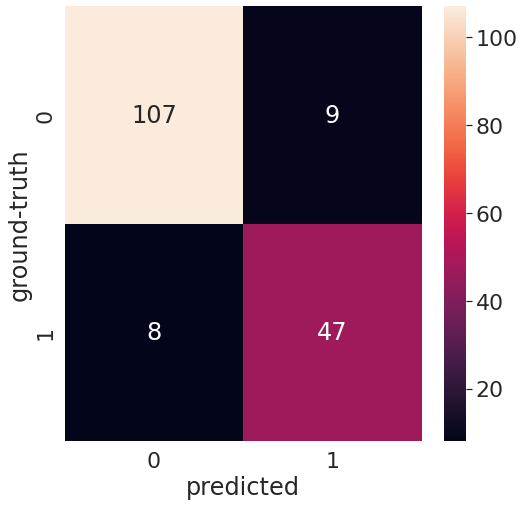

In [86]:
from sklearn.metrics import confusion_matrix


plt.figure(figsize=(8,8))
sns.set(font_scale=2)
confusion_matrix = confusion_matrix(test_y, classifier.predict(test_k_best))
sns.heatmap(confusion_matrix, annot=True, fmt='d').set(xlabel='predicted', ylabel='ground-truth')
plt.show()

Classification accuracy: 0.942


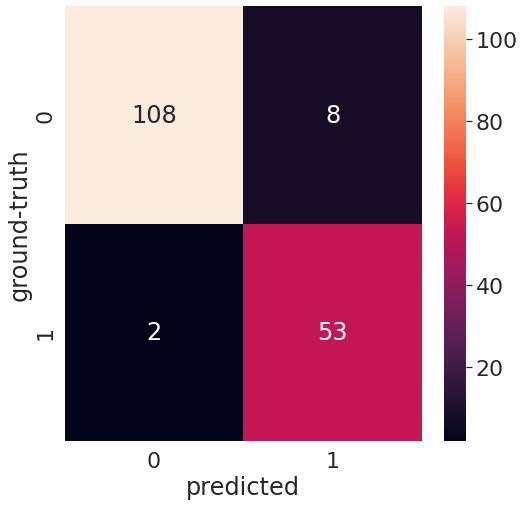

In [123]:
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix

SEED=13
random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(df_exams_unscaled, df_diagnoses, test_size=.3)
classifier = RandomForestClassifier(n_estimators=100, random_state=SEED)

rfe = RFE(estimator=classifier, n_features_to_select=5, step=1)
rfe.fit(train_x, train_y)

train_rfe = rfe.transform(train_x)
test_rfe = rfe.transform(test_x)
classifier.fit(train_rfe, train_y)

print('Classification accuracy: {:.3f}'.format(classifier.score(test_rfe, test_y)))

plt.figure(figsize=(8,8))
sns.set(font_scale=2)
confusion_matrix = confusion_matrix(test_y, classifier.predict(test_rfe))
sns.heatmap(confusion_matrix, annot=True, fmt='d').set(xlabel='predicted', ylabel='ground-truth')
plt.show()

Classification accuracy: 0.953


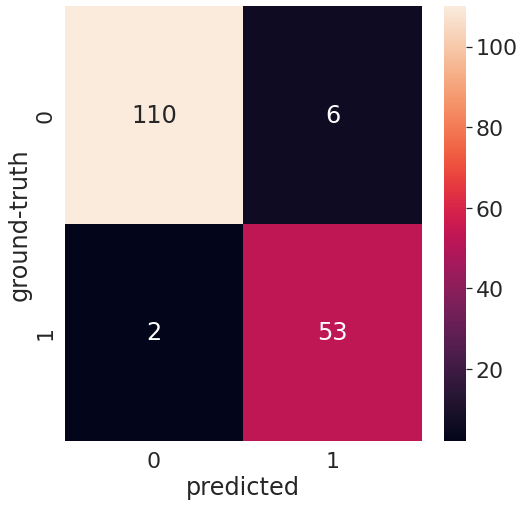

In [124]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix

SEED=13
random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(df_exams_unscaled, df_diagnoses, test_size=.3)
classifier = RandomForestClassifier(n_estimators=100, random_state=SEED)

rfecv = RFECV(estimator=classifier, cv=5, step=1, scoring='accuracy')
rfecv.fit(train_x, train_y)

train_rfecv = rfecv.transform(train_x)
test_rfecv = rfecv.transform(test_x)
classifier.fit(train_rfecv, train_y)

print('Classification accuracy: {:.3f}'.format(classifier.score(test_rfecv, test_y)))

plt.figure(figsize=(8,8))
sns.set(font_scale=2)
confusion_matrix = confusion_matrix(test_y, classifier.predict(test_rfecv))
sns.heatmap(confusion_matrix, annot=True, fmt='d').set(xlabel='predicted', ylabel='ground-truth')
plt.show()

In [125]:
#Features selected by rfcev
train_x.columns[rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_8', 'exame_9', 'exame_12',
       'exame_14', 'exame_15', 'exame_23', 'exame_25', 'exame_27', 'exame_28',
       'exame_30'],
      dtype='object')

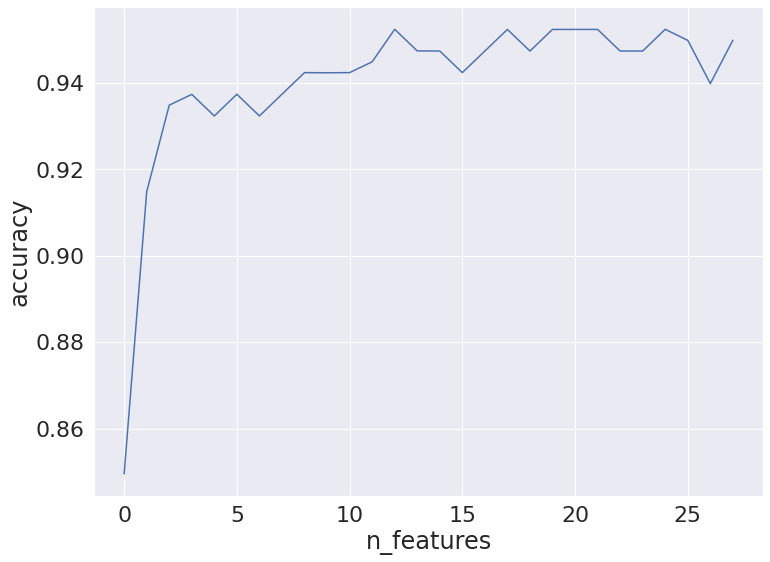

In [130]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12,9))
plt.xlabel("n_features")
plt.ylabel("accuracy")
plt.plot(range(len(rfecv.grid_scores_)), rfecv.grid_scores_)
plt.show()

In [132]:
SEED=13
random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(df_exams_unscaled, df_diagnoses, test_size=.3)
classifier = RandomForestClassifier(n_estimators=100, random_state=SEED)

rfe = RFE(estimator=classifier, n_features_to_select=2, step=1)
rfe.fit(train_x, train_y)

df_exams_clean_4 = rfe.transform(df_exams_clean_3)

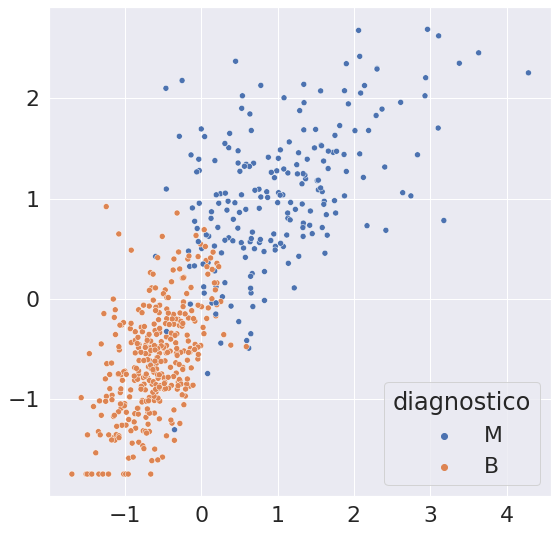

In [135]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=df_exams_clean_4[:,0],y=df_exams_clean_4[:,1], hue=df_diagnoses)
plt.show()

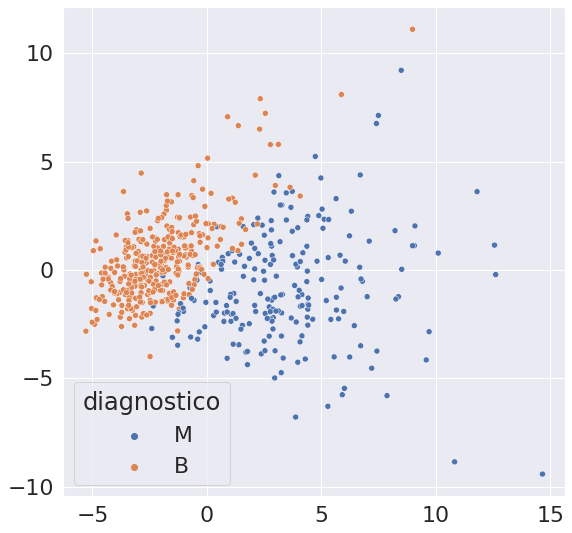

In [149]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)

df_exams_clean_5  = pca.fit_transform(df_exams_clean_3)

plt.figure(figsize=(9,9))
sns.scatterplot(x=df_exams_clean_5[:,0],y=df_exams_clean_5[:,1], hue=df_diagnoses)
plt.show()

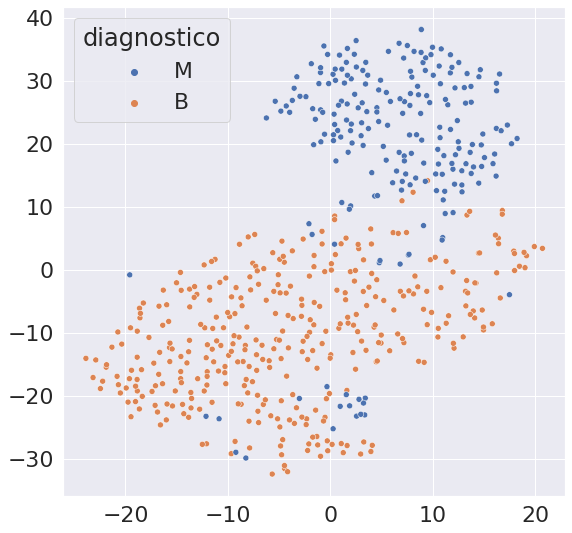

In [151]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2)

df_exams_clean_6  = tsne.fit_transform(df_exams_clean_3)

plt.figure(figsize=(9,9))
sns.scatterplot(x=df_exams_clean_6[:,0],y=df_exams_clean_6[:,1], hue=df_diagnoses)
plt.show()